In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

plt.rcParams['figure.figsize'] = (11, 8)

figures = '..\\figures\\'

In [2]:
#Define functions
def bisection(f, a, b, tol):
    '''
    Inputs:
        f: function to find roots of
        a: left side of interval
        b: right side of interval
        tol: accuracy desired
    Returns:
        roots: roots of the function
        intSize: size of the intervals [bk - ak]
    '''
    intSize = []
    mvals = []
    
    #Need to ensure f(a)f(b) < 0 so we know our interval contains root
    if f(a)*f(b) > 0:
        raise Exception('The interval chosen does not contain a root or contains multiple roots.')
    
    while np.abs(b - a) > tol:
        intSize.append(b - a)
        m = a + (b - a) / 2 #midpoint for next iteration
        mvals.append(m)
        if np.abs(f(m)) < tol:
            break
        elif f(m) * f(a) > 0:
            a = m
        else:
            b = m
        
    return mvals, intSize

def Newton(f, fprime, x0, tol):
    
    #keep a running log of f(x_k) vs x_k for each iteration
    xvals, fvals = [], []
    xvals.append(x0)
    fvals.append(f(x0))
    
    while np.abs(f(x0)) > tol:
        
        #need to ensure we do not divide by 0
        if np.abs(fprime(x0)) < np.finfo(np.float32).eps:
            raise Exception("Divide by zero error.")
        
        x0 = x0 - (f(x0) / fprime(x0))
        xvals.append(x0)
        fvals.append(f(x0))
        
    return x0, xvals, fvals

def FixedPoint(f, x0, tol):
    
    xvals = []
    fvals = []
    err = 1
    
    while err > tol:
        xvals.append(x0)
        x = f(x0)
        fvals.append
        err = np.abs(x0 - x)
        x0 = x
        
    xvals.append(x0) #capture last iteration value
    
    return x, xvals

# Test 1

## Determine the roots and the various intervals of convergence for the methods on the following problem: $$f(x) = xe^{−x} − 0.06064$$

### 1.1.) Plot f(x)

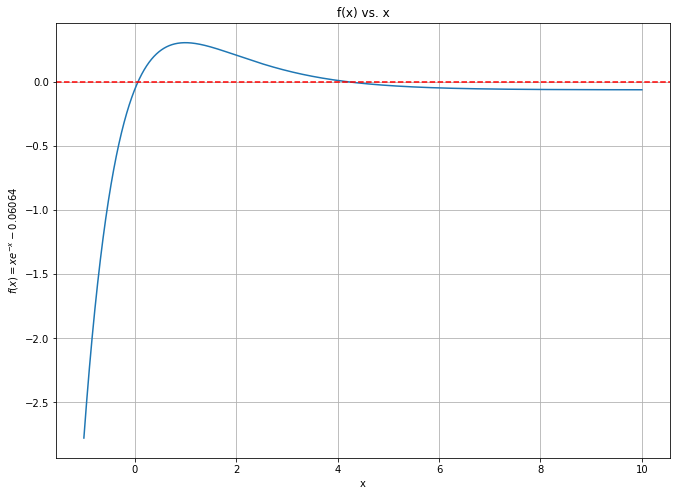

In [3]:
xi = np.linspace(-1, 10, 10000)
f = lambda x: x*np.exp(-x) - 0.06064
plt.plot(xi, f(xi))
plt.axhline(0, color = 'r', linestyle = '--')

plt.xlabel("x")
plt.ylabel(r"$f(x) = xe^{-x} - 0.06064$")
plt.title("f(x) vs. x")
plt.grid()
plt.savefig(os.path.join(figures, 'f(x)'), bbox_inches='tight', dpi = 300)
plt.show()

### 1.2.) Bisection:

In [4]:
f = lambda x: x*np.exp(-x) - 0.06064
r1 = bisection(f, 0, 1, 1e-6)
print("r1 = {} in {} iterations".format(r1[0][-1], len(r1[0])))
r2 = bisection(f, 1, 7, 1e-6)
print("r2 = {} in {} iterations".format(r2[0][-1], len(r1[0])))

r1 = 0.06469345092773438 in 18 iterations
r2 = 4.2496185302734375 in 18 iterations


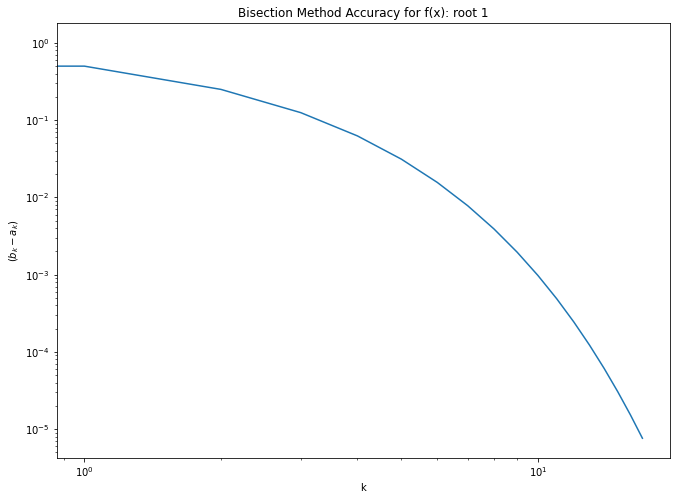

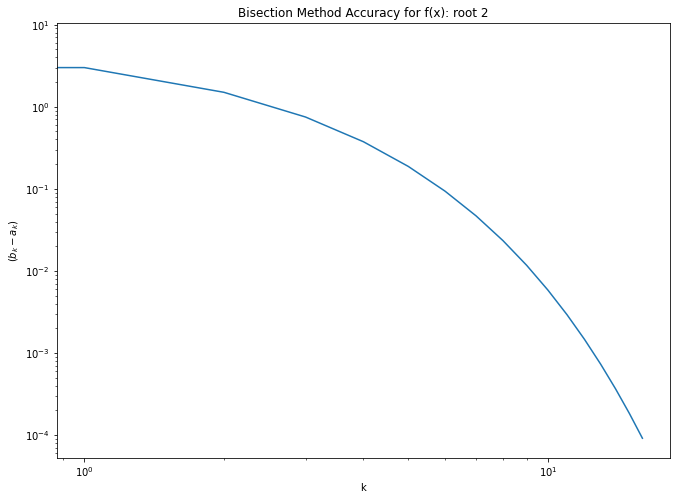

In [5]:
plt.loglog(r1[1])
plt.xlabel('k')
plt.ylabel(r'$(b_k - a_k)$')
plt.title("Bisection Method Accuracy for f(x): root 1")
plt.savefig(os.path.join(figures, 'Bisection_f_root1'), bbox_inches='tight', dpi = 300)
plt.show()

plt.loglog(r2[1])
plt.xlabel('k')
plt.ylabel(r'$(b_k - a_k)$')
plt.title("Bisection Method Accuracy for f(x): root 2")
plt.savefig(os.path.join(figures, 'Bisection_f_root2'), bbox_inches='tight', dpi = 300)
plt.show()

### 1.3.) Newton's method:

In [6]:
fprime = lambda x: np.exp(-x)*(1-x)

In [7]:
#Test x0 = 1
newton1 = Newton(f, fprime, 1, 1e-6)

Exception: Divide by zero error.

Starting with an initial value $x_0 = 1$, we can see that the value of the derivative would be 0, leaving us with an undefined answer as we divide by this value in the method.

In [ ]:
#Test x0 = 0.99
newton2 = Newton(f, fprime, 0.99, 1e-6)
print("r1 = {} in {} iterations".format(newton2[0], len(newton2[1])))

#plot the size of the interval b-a at each iteration
plt.plot(newton2[1], newton2[2])
plt.xlabel(r'$x_k$')
plt.ylabel(r'$f(x_k)$')
plt.title(r"Newton's method on f(x); $x_0 = 0.99$")
plt.savefig(os.path.join(figures, 'Newtons_f_0.99.png'), bbox_inches='tight', dpi = 300)
plt.show()


#test x0 = 0.
newton = Newton(f, fprime, 0., 1e-6)

print("r1 = {} in {} iterations".format(newton[0], len(newton[1])))
plt.plot(newton[1], newton[2])
plt.xlabel(r'$x_k$')
plt.ylabel(r'$f(x_k)$')
plt.title(r"Newton's method on f(x); $x_0 = 0.0$")
plt.savefig(os.path.join(figures, 'Newtons_f_0.0.png'), bbox_inches='tight', dpi = 300)
plt.show()

#test x0 = 1.1
newton = Newton(f, fprime, 1.1, 1e-6)

print("r1 = {} in {} iterations".format(newton[0], len(newton[1])))
plt.plot(newton[1], newton[2])
plt.xlabel(r'$x_k$')
plt.ylabel(r'$f(x_k)$')
plt.title(r"Newton's method on f(x); $x_0 = 1.1$")
plt.savefig(os.path.join(figures, 'Newtons_f_1.1.png'), bbox_inches='tight', dpi = 300)
plt.show()

# Test better $x_0$'s for each root

In [ ]:
#test x0 = 4
newton = Newton(f, fprime, 4., 1e-6)

print("r2 = {} in {} iterations".format(newton[0], len(newton[1])))
plt.plot(newton[1], newton[2])
plt.xlabel(r'$x_k$')
plt.ylabel(r'$f(x_k)$')
plt.title(r"Newton's method with $x_0 = 4.0$")
plt.savefig(os.path.join(figures, 'Newtons_f_4.0.png'), bbox_inches='tight', dpi = 300)
plt.show()

#test x0 = 6
newton = Newton(f, fprime, 6., 1e-6)

print("r2 = {} in {} iterations".format(newton[0], len(newton[1])))
plt.plot(newton[1], newton[2])
plt.xlabel(r'$x_k$')
plt.ylabel(r'$f(x_k)$')
plt.title(r"Newton's method with $x_0 = 6.0$")
plt.savefig(os.path.join(figures, 'Newtons_f_6.0.png'), bbox_inches='tight', dpi = 300)
plt.show()

### 4.) Fixed-point method:

In [ ]:
#fixed point functions for test 1
phi = lambda x: 0.06064 * np.exp(x)
phi1 = lambda x: np.log(x) - np.log(0.06064)

#perform fixed point for x0 = 0
fixed = FixedPoint(phi, 0., 1e-6)
print("Fixed-point found root = {} in {} iterations".format(fixed[0], len(fixed[1])))


x = np.linspace(0.0, 0.1, 1000)
plt.scatter(fixed[1], phi(fixed[1]), label = r'$(x_{n}, \phi(x_{n}))$', zorder = 3)
plt.plot(x, phi(x), label = r'$\phi(x)$')
plt.plot(x, x, label = r'$y = x$')
plt.xlabel(r"$x$")
plt.ylabel(r"$\phi(x) = 0.06064e^{x}$")
plt.title(r"Fixed-Point Iteration: $x_0 = 0.0$")

plt.legend()
plt.grid()
plt.savefig(os.path.join(figures, 'Fixed_f_0.0.png'), bbox_inches='tight', dpi = 300)
plt.show()

In [ ]:
fixed1 = FixedPoint(phi1, 4.5, 1e-6)
print("Fixed-point found root = {} in {} iterations".format(fixed1[0], len(fixed1[1])))

x = np.linspace(4.2, 4.6, 1000)
plt.scatter(fixed1[1], phi1(fixed1[1]), label = r'$(x_{n}, \phi(x_{n}))$', zorder = 3)
plt.plot(x, phi1(x), label = r'$\phi(x)$')
plt.plot(x, x, label = r'$y = x$')
plt.xlabel("x")
plt.ylabel(r'$\phi(x) = ln(x) - ln(0.06064)$')
plt.title(r"Fixed-Point Iteration: $x_0 = 4.5$")

plt.legend()
plt.grid()
plt.savefig(os.path.join(figures, 'Fixed_f_4.5.png'), bbox_inches='tight', dpi = 300)
plt.show()

# Test 2

## Determine the roots and the various intervals of convergence for the methods on the following problem: $$g(x) = x^3 - x -6$$

### 2.1) Plot g(x)

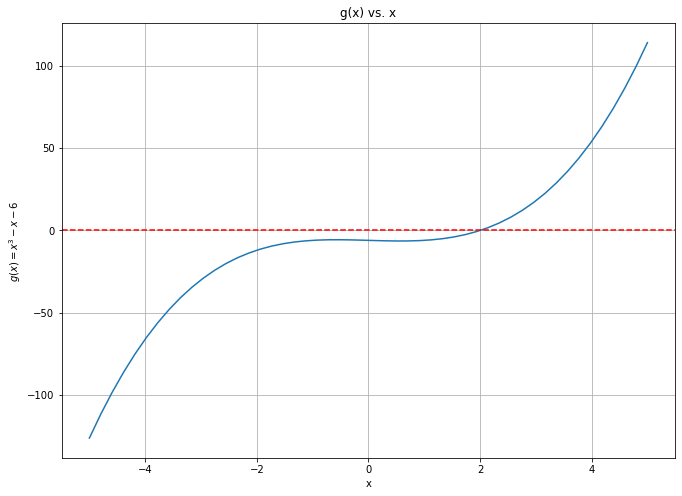

In [3]:
g = lambda x: x**3 - x - 6
x = np.linspace(-5, 5)

plt.plot(x, g(x))
plt.axhline(0, color = 'r', linestyle="--")

plt.xlabel('x')
plt.ylabel(r'$g(x) = x^3 - x - 6$')
plt.title("g(x) vs. x")

plt.grid()
plt.savefig(os.path.join(figures, 'g(x)'), bbox_inches='tight', dpi = 300)
plt.show()

### 2.2) Bisection:

In [4]:
rg = bisection(g, 1, 10, 1e-6)
print("root = {} in {} iterations".format(rg[0][-1], len(rg[0])))

root = 1.9999999403953552 in 24 iterations


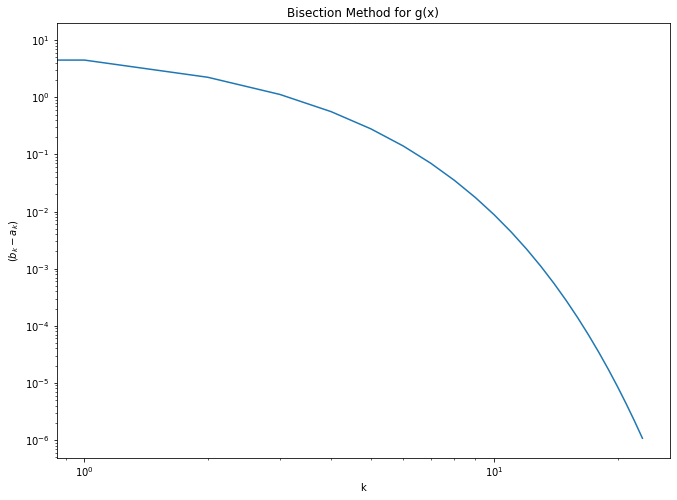

In [10]:
plt.loglog(rg[1])
plt.xlabel('k')
plt.ylabel(r'$(b_k - a_k)$')
plt.title("Bisection Method for g(x)")
plt.savefig(os.path.join(figures, 'Bisection_g.png'), bbox_inches='tight', dpi = 300)
plt.show()

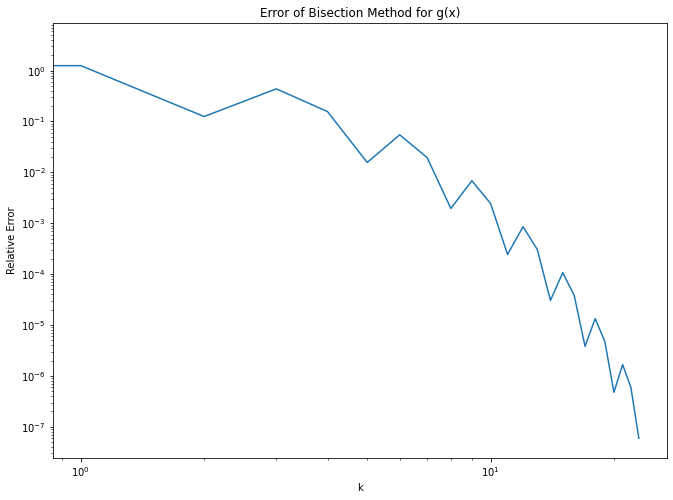

In [5]:
bisecErr = [np.abs(2 - rg[0][i]) for i in range(len(rg[1]))]
plt.loglog(bisecErr)
plt.xlabel('k')
plt.ylabel('Relative Error')
plt.title("Error of Bisection Method for g(x)")
plt.savefig(os.path.join(figures, 'Bisection_g_err.png'), bbox_inches='tight', dpi = 300)
plt.show()

### 2.3.) Newton's Method:

In [12]:
gprime = lambda x: 3 * x**2 - 1

In [13]:
#Test x0 = 1/sqrt(3)
gNewton = Newton(g, gprime, 1/np.sqrt(3), 1e-6)

Exception: Divide by zero error.

root of g(x) is 2.000000000927446 in 47 iterations


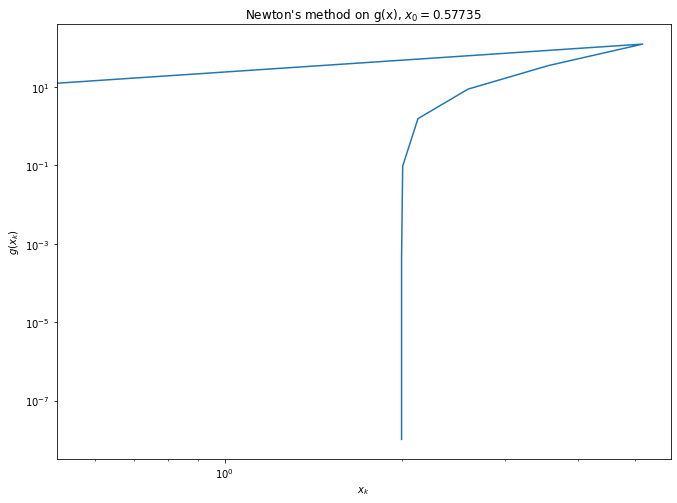

In [26]:
#Test x0 = 0.57735
gNewton = Newton(g, gprime, 0.57735, 1e-6)
print("root of g(x) is {} in {} iterations".format(gNewton[0], len(gNewton[1])))

#plot the size of the interval b-a at each iteration
plt.loglog(gNewton[1], gNewton[2])
plt.xlabel(r'$x_k$')
plt.ylabel(r'$g(x_k)$')
plt.title(r"Newton's method on g(x), $x_0 = 0.57735$")
plt.savefig(os.path.join(figures, 'Newtons_g_0.57735.png'), bbox_inches='tight', dpi = 300)
plt.show()

root of g(x) is 2.0000000742307935 in 7 iterations


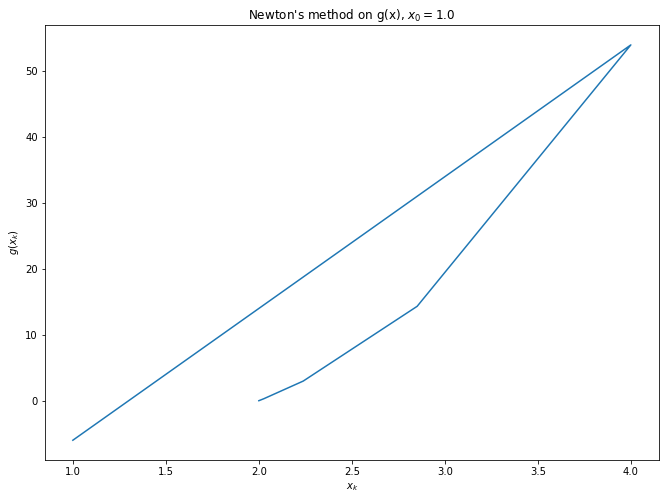

root of g(x) is 2.0000000064831767 in 32 iterations


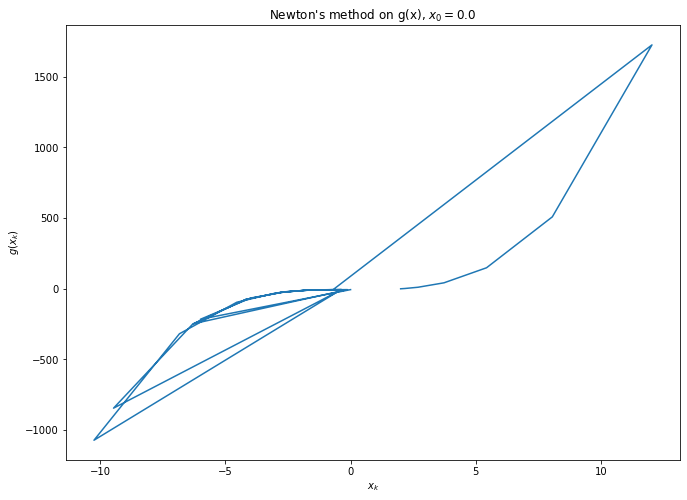

root of g(x) is 2.0000000000004143 in 5 iterations


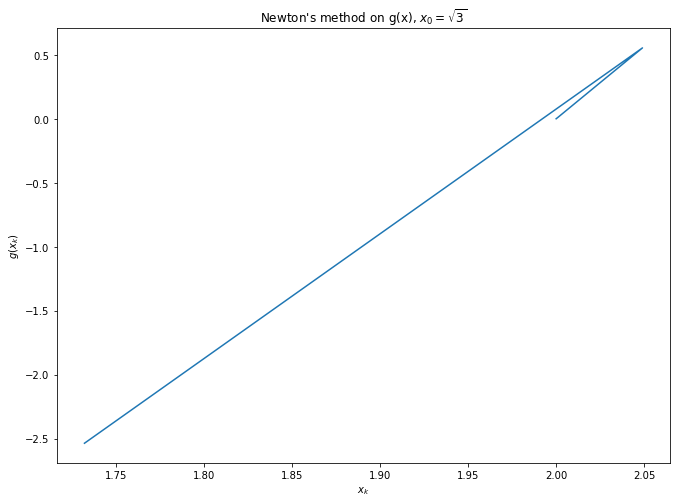

In [22]:
#Test x0 = 1.
gNewton = Newton(g, gprime, 1., 1e-6)
print("root of g(x) is {} in {} iterations".format(gNewton[0], len(gNewton[1])))

#plot the size of the interval b-a at each iteration
plt.plot(gNewton[1], gNewton[2])
plt.xlabel(r'$x_k$')
plt.ylabel(r'$g(x_k)$')
plt.title(r"Newton's method on g(x), $x_0 = 1.0$")
plt.savefig(os.path.join(figures, 'Newtons_g_1.0.png'), bbox_inches='tight', dpi = 300)
plt.show()

#Test x0 = 0.
gNewton = Newton(g, gprime, 0., 1e-6)
print("root of g(x) is {} in {} iterations".format(gNewton[0], len(gNewton[1])))

#plot the size of the interval b-a at each iteration
plt.plot(gNewton[1], gNewton[2])
plt.xlabel(r'$x_k$')
plt.ylabel(r'$g(x_k)$')
plt.title(r"Newton's method on g(x), $x_0 = 0.0$")
plt.savefig(os.path.join(figures, 'Newtons_g_0.0.png'), bbox_inches='tight', dpi = 300)
plt.show()

#Test x0 = sqrt(3)
gNewton = Newton(g, gprime, np.sqrt(3), 1e-6)
print("root of g(x) is {} in {} iterations".format(gNewton[0], len(gNewton[1])))

#plot the size of the interval b-a at each iteration
plt.plot(gNewton[1], gNewton[2])
plt.xlabel(r'$x_k$')
plt.ylabel(r'$g(x_k)$')
plt.title(r"Newton's method on g(x), $x_0 = \sqrt{3}$")
plt.savefig(os.path.join(figures, 'Newtons_g_sqrt3.png'), bbox_inches='tight', dpi = 300)
plt.show()

### 2.4.) Fixed-point Method:

root of g(x) is 2.000000 in 8 iterations


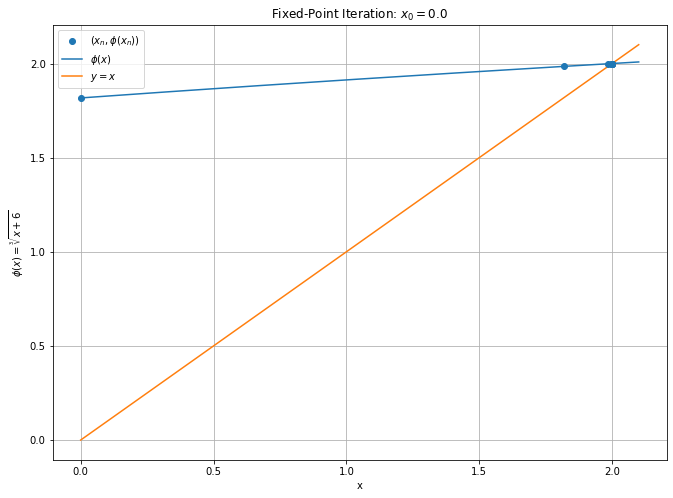

In [22]:
phi_g = lambda x: np.cbrt(x+6)

#perform fixed point for x0 = 0
fixed_g = FixedPoint(phi_g, 0., 1e-6)
print("root of g(x) is {:.6f} in {} iterations".format(fixed_g[0], len(fixed_g[1])))

x = np.linspace(0.0, 2.1, 1000)
plt.scatter(fixed_g[1], [phi_g(item) for item in fixed_g[1]], label = r'$(x_{n}, \phi(x_{n}))$', zorder = 3)
plt.plot(x, phi_g(x), label = r'$\phi(x)$')
plt.plot(x, x, label = r'$y = x$')
plt.xlabel("x")
plt.ylabel(r'$\phi(x) = \sqrt[3]{x+6}$')
plt.title(r"Fixed-Point Iteration: $x_0 = 0.0$")

plt.legend()
plt.grid()
plt.savefig(os.path.join(figures, 'Fixed_g.png'), bbox_inches='tight', dpi = 300)
plt.show()

# Correctness Test

### Test.1) Bisection Method:

A root of f(x) is 4.249756 found in 12 iterations


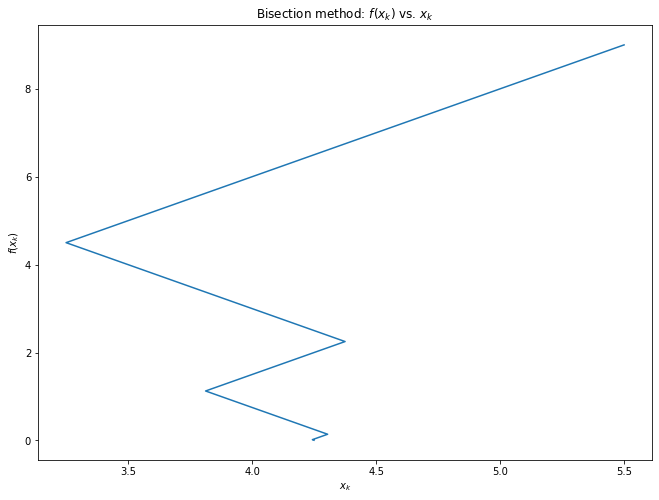

In [23]:
CorrTest1 = bisection(f, 1, 10, 10e-6)
print("A root of f(x) is {:.6f} found in {} iterations".format(CorrTest1[0][-1], len(CorrTest1[0])))

plt.plot(CorrTest1[0], CorrTest1[1])
plt.xlabel(r"$x_k$")
plt.ylabel(r"$f(x_k)$")
plt.title(r"Bisection method: $f(x_k)$ vs. $x_k$")
plt.savefig(os.path.join(figures, 'Bisection_Test.png'), bbox_inches='tight', dpi = 300)
plt.show()

### Test.2) Newton's Method:

A root of f(x) is 4.249621 found in 5 iterations


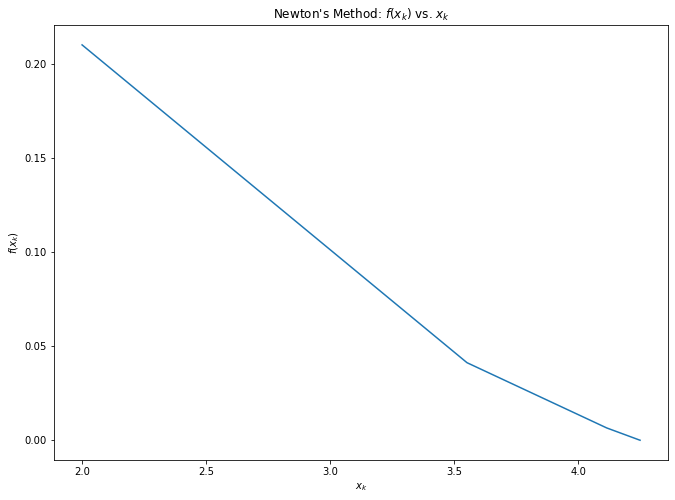

In [24]:
CorrTest2 = Newton(f, fprime, 2, 10e-6)
print("A root of f(x) is {:.6f} found in {} iterations".format(CorrTest2[0], len(CorrTest2[1])))

plt.plot(CorrTest2[1], CorrTest2[2])
plt.xlabel(r"$x_k$")
plt.ylabel(r"$f(x_k)$")
plt.title(r"Newton's Method: $f(x_k)$ vs. $x_k$")
plt.savefig(os.path.join(figures, 'Newtons_Test.png'), bbox_inches='tight', dpi = 300)
plt.show()

### Test.3) Fixed-Point Method:

In [25]:
phi_test = lambda x: x * np.exp(-x) + x - 0.06064

A root of f(x) is 4.249430 found in 183 iterations


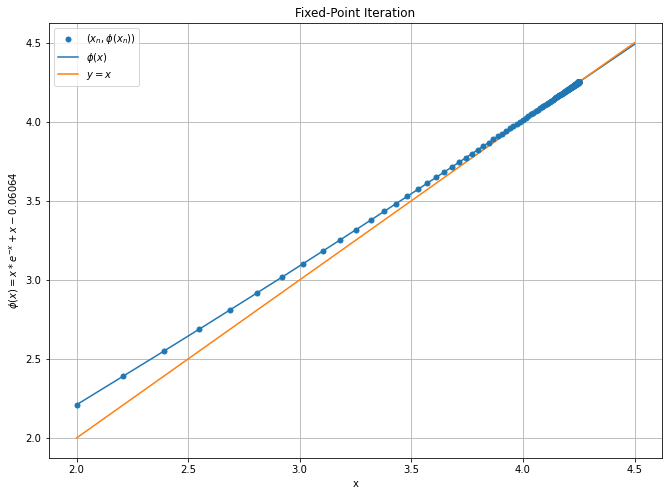

In [26]:
CorrTest3 = FixedPoint(f = phi_test, x0 = 2, tol = 10e-6)

print("A root of f(x) is {:.6f} found in {} iterations".format(CorrTest3[0], len(CorrTest3[1])))

x = np.linspace(2., 4.5, 1000)
plt.scatter(CorrTest3[1], [phi_test(item) for item in CorrTest3[1]], s = 25, label = r'$(x_{n}, \phi(x_{n}))$', zorder = 3)
plt.plot(x, phi_test(x), label = r'$\phi(x)$')
plt.plot(x, x, label = r'$y = x$')
plt.xlabel("x")
plt.ylabel(r'$\phi(x) = x * e^{-x} + x - 0.06064$')
plt.title("Fixed-Point Iteration")

plt.legend()
plt.grid()
plt.savefig(os.path.join(figures, 'Fixed_Test_phi.png'), bbox_inches='tight', dpi = 300)
plt.show()

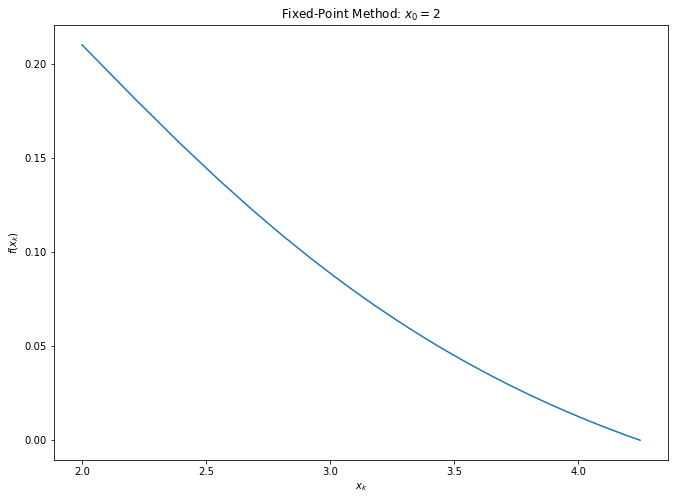

In [27]:
plt.plot(CorrTest3[1], [f(item) for item in CorrTest3[1]])
plt.xlabel(r'$x_k$')
plt.ylabel(r'$f(x_k)$')
plt.title(r"Fixed-Point Method: $x_0 = 2$")
plt.savefig(os.path.join(figures, 'Fixed_Test_fx.png'), bbox_inches='tight', dpi = 300)
plt.show()